# Méthodes Numériques - TP noté ET4

## Population d'éléphants et modèle de Leslie
A la fin du TP, on vous demande d'envoyer un jupyter Notebook NOM_Prénom_Leslie.ipynb à votre chargé de TP (Joel.gay@universite-paris-saclay.fr ou anne-catherine.letournel@universite-paris-saclay.fr). Le sujet de l'email devra être [TP Noté ET4 MethNum] NOM prénom

In [55]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

On étudie le nombre d'individus éléphants dans une réserve en Tanzanie.
La population totale d'individus est répartie en compartiments totalisant chacun le nombre d'éléphants à la date T dans une tranche d'âge donnée.
Il y a 6 compartiments représentant les tranches d'âges par dizaine:  
$$[0-10], \, [10-20], \, [20-30], \, [30-40], \,[40-50] \text{ et } [50-60],$$ l'espérance de vie d'un éléphant étant de 60 ans (on considèrera donc qu'il n'y en a pas de plus de 60 ans).

<p>
Dans chaque compartiment, les caractéristiques de la population ont deux caractéristiques : </p>
<ul> 
    <li>$s_i$, le taux de survie sur 10 ans, représente la proportion d'éléphants qui atteindra la tranche d'âge suivante.</li>
    <li>$f_i$, le taux de fécondité des individus de la tranche d'âge sur 10 ans.</li>
</ul>

| 0 à 10 ans | 10 à 20 ans | 20 à 30 ans| 30 à 40 ans| 40 à 50 ans | 50 à 60 ans |
|------------|-------------|------------|------------|-------------|------------|
| $s_0$ | $s_1$ | $s_2$ | $s_3$ | $s_4$ | $s_5$ | $s_6 = 0$ |
| $f_0$ | $f_1$ | $f_2$ | $f_3$ | $f_4$ | $f_5$ |

<em>Pour visualiser la cellule suivante, vous devez télécharger le fichier modele_Leslie.pdf dans votre dossier, puis valider la cellule</em>

In [56]:
from IPython.display import IFrame
IFrame("modele_Leslie_1.pdf", width=800, height=400)

On note $N(t) = \begin{pmatrix}n_0(t)\\n_1(t)\\\vdots \\ n_5(t)\end{pmatrix}$ le vecteur dont les composantes $n_i(t)$ sont le cardinal de chaque compartiment au temps $t$, et on considère la matrice suivante, appelée matrice de Leslie. Noter que $s_5 = 0$ car il n'y a pas de compartiment pour la tranche d'âge supérieure.

$$L = \begin{pmatrix}
f_0 & f_1 & \dots&  \dots & f_5 \\
s_0 & 0 & \dots & \dots &0 \\
0 & s_1 & \ddots & &\vdots \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \dots & 0 & s_4 & 0
\end{pmatrix}$$

On remarque alors que $N(T+1) = L \cdot N(T)$ où $T$ est une période de 10 ans

1) Coder la fonction <tt>Leslie</tt> qui prend les vecteurs <tt>Survie</tt> et <tt>Fecondité</tt> en paramètres et retourne la matrice de Leslie correspondant au modèle.

In [57]:
def Leslie(Fecondité,Survie):
    tab=np.zeros((len(Fecondité),len(Fecondité) ))
    for i in range((len(Fecondité))):
        tab[0][i]=Fecondité[i]
    
    for i in range ((len(Fecondité))-1):
        tab[i+1][i]=Survie[i]
                   
    return tab
                   
                    
                   
    
    
    

2) Tester votre fonction sur <tt>Survie = [.33, .33, .33, .33, .33, .33]</tt> et <tt>Fecondite = [0, 2, 2, 2, 2, 0]</tt>

In [58]:
Survie = [.33, .33, .33, .33, .33, .33] 
Fecondite = [0, 2, 2, 2, 2, 0]
A=Leslie(Fecondite,Survie)
print(len(A))
A

6


array([[0.  , 2.  , 2.  , 2.  , 2.  , 0.  ],
       [0.33, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.33, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.33, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.33, 0.  ]])

On admet que les matrices de Leslie possèdent une valeur propre $\lambda$, telle que $\lambda$ est supérieur en module à toutes leurs autres valeurs propres, et que l'espace propre associé est de dimension 1. Dans un tel cas on peut prendre dans la droite propre associée à $\lambda$ un vecteur dont toutes les coordonnées sont positives. 

L'objectif du problème est de définir le comportement asymptotique de l'évolution de la population. Pour cela, dans un premier temps, on va utiliser la méthode de la puissance appliquée à la matrice de Leslie pour en déterminer la plus grande valeur propre ainsi qu'un vecteur propre (à coordonnées positives) correspondant.

3) Ecrire une fonction <tt>Puissance</tt> qui prend la matrice de Leslie $L$ en entrée, un vecteur $N_0$ quelconque correspondant à la population initiale d'éléphants, <tt>tol</tt> et <tt>itermax</tt>. Elle retourne sa plus grande valeur propre, le vecteur propre associé (de norme 1 et à coefficients positifs) ainsi que le nombre d'itérations utilisées.

In [59]:
def Puissance(L,N,tol,itermax):
    k=0
    while(k<itermax):
        XK=L.dot(N)/la.norm(L.dot(N))
        Lambda=XK.transpose()@L@XK
        k+=1
        
        if (la.norm(L.dot(XK)-Lambda*XK)<tol):
            break
        N=XK
    return [XK],Lambda,itermax
    
    

4) Tester votre fonction sur la matrice $L$ précédente et vérifier la relation entre la matrice de Leslie, le vecteur propre et sa valeur propre associée.

In [60]:
L=Leslie(Fecondite,Survie)
print(la.eig(L))

(array([ 0.        +0.j        ,  0.98904201+0.j        ,
       -0.63429366+0.j        , -0.37505539+0.j        ,
        0.01015352+0.31733679j,  0.01015352-0.31733679j]), array([[ 0.        +0.j        ,  0.94269573+0.j        ,
        -0.85417361+0.j        ,  0.53645683+0.j        ,
         0.0587727 +0.36436183j,  0.0587727 -0.36436183j],
       [ 0.        +0.j        ,  0.31453627+0.j        ,
         0.44439557+0.j        , -0.4720123 +0.j        ,
         0.38046758-0.04894455j,  0.38046758+0.04894455j],
       [ 0.        +0.j        ,  0.10494698+0.j        ,
        -0.23120291+0.j        ,  0.41530948+0.j        ,
        -0.03819933-0.39687223j, -0.03819933+0.39687223j],
       [ 0.        +0.j        ,  0.03501621+0.j        ,
         0.12028649+0.j        , -0.36541836+0.j        ,
        -0.41355689+0.02649148j, -0.41355689-0.02649148j],
       [ 0.        +0.j        ,  0.01168338+0.j        ,
        -0.0625807 +0.j        ,  0.32152067+0.j        ,
         0

In [61]:
Puissance(L,[1, 1, 1, 1,1, 1],1e-7,1e100)

([array([0.94269571, 0.31453632, 0.10494697, 0.03501622, 0.01168337,
         0.00389823])],
 0.9890420830737973,
 1e+100)

## On étudie le taux net de reproduction R0.

La théorie du modèle définit $R_0 = f_0 + s_0\cdot f_1 + s_0\cdot s_1 \cdot f_2 + s_0\cdot s_1 \cdot s_2 \cdot f_3 + s_0\cdot s_1 \cdot s_2\cdot s_3\cdot f_4$, avec la propriété suivante : 
* Si $R_0 > 1$, la population croît,
* Si $R_0 < 1$, la population décroît,
* Si $R_0 = 1$, la population est stable dans le temps.

5) Donner l'expression mathématique de $R_0$ dans l'hypothèse simpliste où <tt>Survie = [s, s, s, s, s, 0]</tt> et <tt>Fecondite = [0, 2, 2, 2, 2, 0]</tt>, où $s$ peut être vu comme un paramètre de $R_0$.

r0 =2*( s  + s^2 + s^3 + s^4)

In [62]:
s=2
r0 =2*( s  + s^2 + s^3 + s^4)
r0

2

On étudie le cas où $R_0 = 1$.

6) Ecrire (mathématiquement) le polynôme $P(s) = R_0(s) -1 $ en $s$ de degré 4.

P(s)=2*( s + s^2 + s^3 + s^4)-1

7) Afficher la courbe du polynôme $P$ entre 0 et 1. 

In [77]:
s=np.arange(-2,1,0.001)

def P(s):
    return 2*( s + s**2 + s**3 + s**4)-1

In [82]:
s

array([-2.   , -1.999, -1.998, ...,  0.997,  0.998,  0.999])

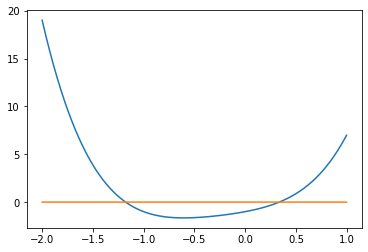

In [78]:
plt.plot(s,P(s))
plt.plot(s,s*0)

L'objectif est donc de trouver le zéro de $P$ qui correspond à la valeur critique entre survie et extinction. <br>
On va utiliser la méthode de Newton pour trouver une approximation de la valeur <tt>sseuil</tt> de survie correspondant à ce taux $R_0 = 1$ étant donné que $P(\texttt{sseuil}) = 0$.<br>

<font size="3">**Algorithme : Méthode de Newton**</font><br>
**Nécessite** : $f$ une fonction réelle, $df$ sa dérivée, $x_0$ un réel initial, $tol$ une tolérance, $itermax$ un nombre d'itérations <br>
$\text{} \qquad$ **Répéter** <br>
$\text{} \qquad \qquad x_{k+1} \leftarrow x_k-\frac{f(x_k)}{df(x_k)}$ <br>
$\text{} \qquad \qquad k \leftarrow k + 1$ <br>
$\text{} \qquad $ **jusqu'au critère d'arrêt** <br>
**Retourne** $x_{k+1}$ et $k$

8) Ecrire la fonction <tt>poly</tt> qui étant donné les coefficients $a, b, c, d, e$ d'un polynôme $P$ de degré 4 et $x$ une valeur numérique, renvoie $P(x)$. 

In [79]:
def poly(a,b,c,d,e,x):
    return a*x**4+b*x**3+c*x**2+d*x+e


9) Ecrire la fonction <tt>dpoly</tt> qui étant donné les coefficients $a, b, c, d, e$ d'un polynôme $P$ de degré 4 et $x$ une valeur numérique, renvoie $dP(x)$ où $dP$ est la dérivée de $P$. 

In [66]:
def dpoly (a,b,c,d,x):
    return 4*a*x**3+3*b*x**2+c*2*x+d


10) Ecrire la fonction <tt>Newton</tt> mettant en place la méthode de Newton pour des fonctions polynomiales de degré 4. 

In [67]:
def Newton(a,b,c,d,e,x0,itermax,tol):
    k=0
    while(k<itermax):
        xk=x0-(poly(a,b,c,d,e,x0)/dpoly(a,b,c,d,x0))
        
        k+=1
        if (la.norm(xk-x0)<tol):
            break
        x0=xk
    return xk,k
    
    
    
    

11) Appliquer <tt>Newton</tt> avec $x0 = 0$ puis $x0 = -1$ dans le cas de notre polynôme $P$

In [68]:
A=Newton(2,2,2,2,-1,0,1e7,1e-10)
B=Newton(2,2,2,2,-1,-1,1e7,1e-10)
print(A,B)


(0.33619669316309375, 6) (-1.1778233218143153, 6)


12) Vérifier que les solutions trouvées annulent bien le polynôme $P$.

In [80]:

print(poly(2,2,2,2,-1,A[0]))
print(poly(2,2,2,2,-1,B[0]))


-1.1102230246251565e-16
-8.881784197001252e-16


13) Laquelle de ces deux valeurs correspond à <tt>sseuil</tt> ?

celle qui est posotive puisque on peux pas commencer par une population de depart negative

## Simulation de l'évolution de la population - modèle simplifié

On va afficher l'évolution de la population d'éléphants sur plusieurs décennies pour deux valeurs du taux de survie simplifié: une valeur inférieure au taux de seuil donné par Newton et une valeur supérieure. On pourra utiliser la fonction <tt>np.sum</tt> qui retourne la somme des coefficients d'un tableau pour connaitre la population totale dans la réserve à partir du vecteur N. On calculera la population à chaque décennie par récurrence à partir de la population $N_0$.

14) Ecrire une fonction <tt>Evolution</tt> qui prend en entrée la matrice de Leslie $L$, le nombre de décennies considérées et le vecteur $N_0$ correspondant à la répartition de la population initiale à la décennie $T=0$. La fonction <tt>Evolution</tt> affichera le graphe du nombre d'individus au cours du temps sur le nombre de décennies considéré.

In [70]:
Survie = [.33, .33, .33, .33, .33, .33] 
Fecondite = [0, 2, 2, 2, 2, 0]
L=Leslie(Fecondite,Survie)
def Evolution(L,N,T):
    tab=[]
    temps=np.arange(T)
    for i in range (T):
        k=L@N
        tab.append(np.sum(k))
        N=k
    plt.plot(temps,tab)
    




In [81]:
help(np.sum)

Help on function sum in module numpy:

sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  In 

Un recensement par les gardiens du parc donne la population initiale suivante: N0 = [500, 100, 60, 20, 6, 3] . On étudiera l'évolution sur 100 ans, puis sur 500 ans (le nombre de décennies est donc de 10 puis de 50).

15) Appeler la fonction <tt>Evolution</tt> pour les deux matrices de Leslie correspondant aux valeurs $s=0.33$ et $s=0.37$.

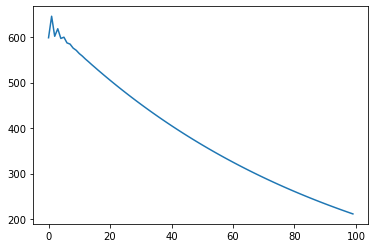

In [71]:
s=0.33
Survie = [s, s, s, s, s, s] 

Fecondite = [0, 2, 2, 2, 2, 0]
L=Leslie(Fecondite,Survie)
N0 = [500, 100, 60, 20, 6, 3]
Evolution(L,N0 ,100)


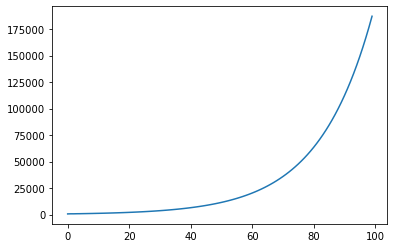

In [72]:
s=0.37
Survie = [s, s, s, s, s, s] 

Fecondite = [0, 2, 2, 2, 2, 0]
L=Leslie(Fecondite,Survie)
N0 = [500, 100, 60, 20, 6, 3]
Evolution(L,N0 ,100)

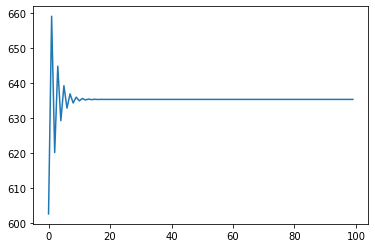

In [73]:
s=0.33619669316309375
Survie = [s, s, s, s, s, s] 

Fecondite = [0, 2, 2, 2, 2, 0]
L=Leslie(Fecondite,Survie)
N0 = [500, 100, 60, 20, 6, 3]
Evolution(L,N0 ,100)

16) Interprétez les courbes

avec une valeur inferieur a notrre seul de stabilite on a une population qui tend vers 0 
si s > seil de stabilite alors elle temps vers l'infinie 
si s= au seuil de stabilite alors la population reste fixe
